# **Projet Soutenance GOMYCODE** 
## üìÖ *Mercredi*, **01/02/2023** - ***Casablanca Hacker Space***, *Maroc*
### üßë *Pr√©sent√© par*  
##**AISSAMI Abdelhay**
###`El√®ve Data Scientist`

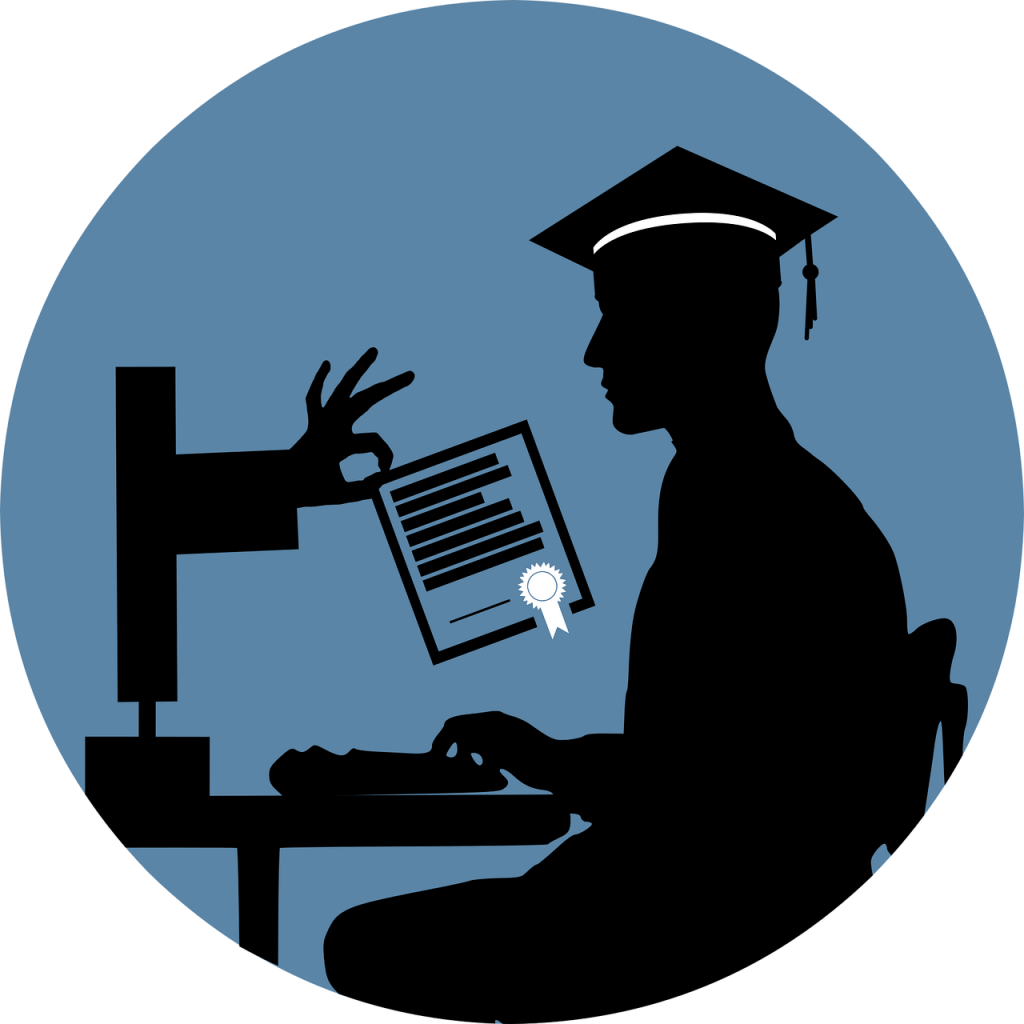


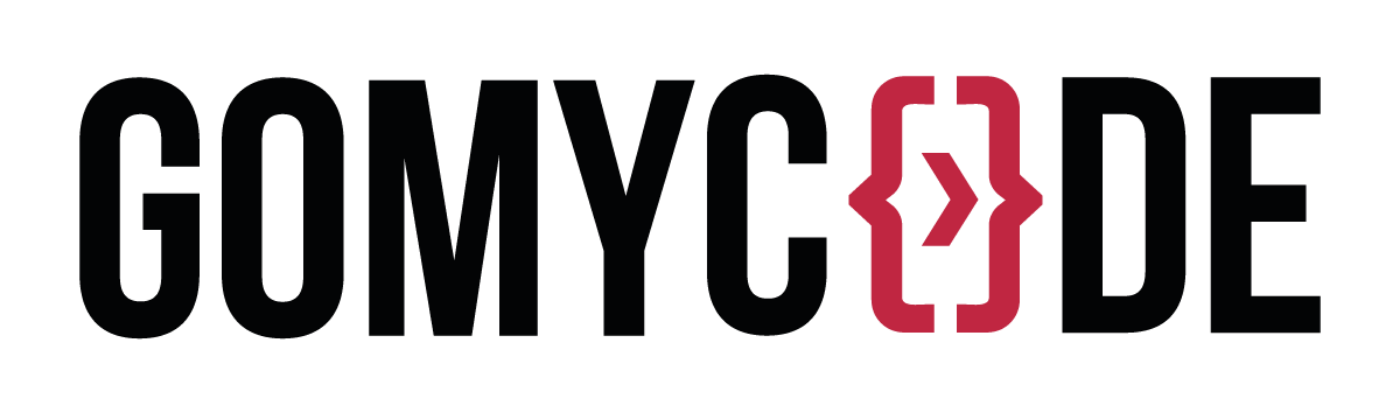

# **Projet De Fin D'√©tude**
## üßë *Instucteur*
###   **Yasser MATRANE**
## **Sujet** : TRADING ALGORITHMIQUE: Pr√©dire les mouvements du march√© des crypto monnaie

# INTRODUCTION


 ¬´ Le financement de Skynet est vot√©. Le syst√®me se met en place le 4 ao√ªt 1997, la d√©cision humaine est √©limin√©e de la D√©fense Strat√©gique. Skynet commence √† apprendre √† vitesse g√©om√©trique. il devient autonome le 29 ao√ªt 1997 √† 2h14 du matin, heure de Greenwich ¬ª. Terminator 2, 1991.

Ces derni√®res ann√©es ont vu d'√©normes progr√®s dans les domaines du machine learning "apprentissage automatique",le Deep Learning et l'intelligence artificielle. L'industrie financi√®re en g√©n√©ral et les traders du monde entier essaient √©galement de b√©n√©ficier de ces technologies avances.

Ce projet pr√©sente des techniques issues des statistiques, comme la r√©gression lin√©aire, et du
machine learning, comme la r√©gression logistique, pour pr√©dire les futurs mouvements de prix en fonction de retours pass√©s. Il illustre √©galement l'utilisation des r√©seaux de neurones pour pr√©dire le mouvements du march√© boursier . Bien entendu, ce projet ne peut remplacer une introduction approfondie au machine learning et au deep learning, mais il peut montrer, du point de vue d'un praticien, comment concr√®tement appliquer certaines techniques au probl√®me de pr√©vision des prix.

# Importation des librairies

In [234]:
import numpy as np
import datetime as dt
import pandas as pd
from cryptocmd import CmcScraper
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_regression

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor ,ExtraTreesRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


from sklearn.metrics import mean_squared_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')

import seaborn as sns
# Create smooth graph of close price data
from scipy.signal import savgol_filter
from math import sqrt
from prophet import Prophet
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import math

from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# web scraping et preprocessing

In [2]:

# initialise scraper
start = dt.date(2014, 12, 15).strftime("%d-%m-%Y")
end = dt.date.today().strftime("%d-%m-%Y")

crypto = ['BTC','ETH','BNB','XRP','SOL','LTC']
for coin in crypto:
    
    scraper = CmcScraper(coin, start, end)

    # # get data as list of list
    headers, data = scraper.get_data()

    # export the data to csv
    scraper.export_csv()
    name = coin+".csv"
    # get dataframe for the data
    scraper.get_dataframe().to_csv(name,index_label = False)

In [3]:
coins = dict(
bitcoin  =pd.read_csv("BTC.csv"),
ethereum = pd.read_csv("ETH.csv"),
ripple = pd.read_csv("XRP.csv"),
solana = pd.read_csv("SOL.csv"),
litecoin = pd.read_csv("LTC.csv")
)

for k,data in coins.items():
    data["slug"] = k
data= pd.concat(coins.values())

names = ['BTC','ETH','XRP', 'SOL','LTC']
coi =list( data["slug"].unique())
dc = {}
for n,c in zip(names,coi):
    dc[c]=n
data["symbol"] = data["slug"].replace(dc)

In [4]:
dataset=data[['slug','symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']]
dataset

slug symbol        Date          Open          High           Low  \
0      bitcoin    BTC  2023-01-21  22677.427382  23282.347722  22511.833134   
1      bitcoin    BTC  2023-01-20  21085.372338  22692.357831  20919.125984   
2      bitcoin    BTC  2023-01-19  20686.745906  21163.012288  20685.381181   
3      bitcoin    BTC  2023-01-18  21161.050900  21564.502213  20541.544549   
4      bitcoin    BTC  2023-01-17  21175.833260  21438.659358  20978.533624   
...        ...    ...         ...           ...           ...           ...   
2955  litecoin    LTC  2014-12-19      2.805280      2.873840      2.727240   
2956  litecoin    LTC  2014-12-18      2.944430      2.995960      2.701970   
2957  litecoin    LTC  2014-12-17      3.010560      3.068830      2.899990   
2958  litecoin    LTC  2014-12-16      3.451840      3.460570      2.989270   
2959  litecoin    LTC  2014-12-15      3.481110      3.481600      3.448860   

             Close        Volume    Market Cap  
0     22777.625809  3.244228e+10  4.388967e+11  
1     22676.551759  2.879915e+10  4.369290e+11  
2     21086.793305  2.115285e+10  4.062799e+11  
3     20688.780730  3.000563e+10  3.985930e+11  
4     21161.519220  2.499998e+10  4.076820e+11  
...            ...           ...           ...  
2955      2.869110  2.780240e+06  1.000160e+08  
2956      2.805570  4.301260e+06  9.772292e+07  
2957      2.940230  3.969240e+06  1.023331e+08  
2958      3.015260  5.220210e+06  1.048602e+08  
2959      3.450780  2.292030e+06  1.199037e+08  

[12622 rows x 9 columns]

In [5]:
dataset.to_csv('cryptos.csv',index_label=False)

In [6]:
data = pd.read_csv('cryptos.csv')
data.index = data.Date
data.drop("Date",axis=1,inplace=True)

In [7]:
data.head()

slug symbol          Open          High           Low  \
Date                                                                   
2023-01-21  bitcoin    BTC  22677.427382  23282.347722  22511.833134   
2023-01-20  bitcoin    BTC  21085.372338  22692.357831  20919.125984   
2023-01-19  bitcoin    BTC  20686.745906  21163.012288  20685.381181   
2023-01-18  bitcoin    BTC  21161.050900  21564.502213  20541.544549   
2023-01-17  bitcoin    BTC  21175.833260  21438.659358  20978.533624   

                   Close        Volume    Market Cap  
Date                                                  
2023-01-21  22777.625809  3.244228e+10  4.388967e+11  
2023-01-20  22676.551759  2.879915e+10  4.369290e+11  
2023-01-19  21086.793305  2.115285e+10  4.062799e+11  
2023-01-18  20688.780730  3.000563e+10  3.985930e+11  
2023-01-17  21161.519220  2.499998e+10  4.076820e+11

In [8]:
name = data['slug'].unique()
print(name)

['bitcoin' 'ethereum' 'ripple' 'solana' 'litecoin']


    Open Le prix du coin au d√©but de la journ√©e de n√©gociation.

    High : Le prix le plus √©lev√© du coin un jour de bourse.

    Low : Le prix le plus bas du coin un jour de bourse.

    Close : Le dernier prix du coin avant la fin de la journ√©e de n√©gociation.

In [9]:
data = data[data.symbol.isin(['BTC','ETH','XRP', 'SOL','LTC' ])]

In [10]:
data.slug.value_counts()

bitcoin     2960
ripple      2960
litecoin    2960
ethereum    2725
solana      1017
Name: slug, dtype: int64

In [11]:
print(data.isnull().sum())

slug          0
symbol        0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64


In [12]:
print(data.duplicated().sum())

0


# Visualisation

2017 a √©t√© une ann√©e d√©cisive pour les cryptomonnaies. Si on a surtout entendu parler de l'envol√©e spectaculaire du bitcoin qui a vu son cours se multiplier par 15, d'autres cryptomonnaies sont pass√©es plus inaper√ßues. C'est le cas de la devise Ripple qui a pourtant gagn√© plus de 36 000 % depuis janvier 2017, comme le met en avant notre graphique.
Fin d√©cembre 2017, on comptait un total de 1 335 monnaies num√©riques diff√©rentes pour une capitalisation boursi√®re atteignant 572 milliards de dollars. √Ä titre de comparaison : en 2016, il existait 644 cryptomonnaies diff√©rentes pour une valeur totale de 16,1 milliards de dollars.
Mais avec l'augmentation du cours des cryptomonnaies, le nombre de personnes qui minent ces devises num√©riques a √©galement fortement grimp√©, provoquant une hausse importante de la consommation d'√©lectricit√© : 29 t√©rawattheures d'√©lectricit√© auraient en effet √©t√© consomm√©es en 2017.

C'est quoi le market cap ?

"Market capitalization (ou market cap en abr√©g√©, MCAP) se traduit par capitalisation boursi√®re. Cela repr√©sente la valeur totale des actions en circulation d'une entreprise cot√©e. Pour l'obtenir, on multiplie le nombre de ces actions par le prix du jour de chacune d'entre elles.

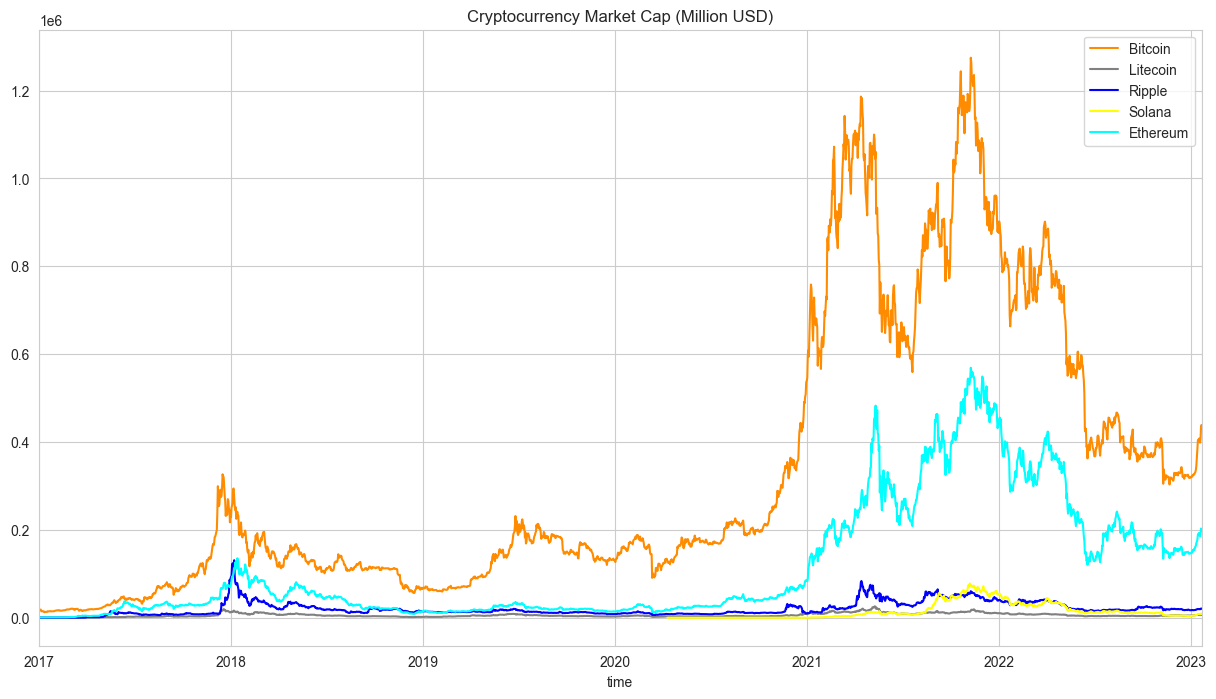

In [222]:
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']
ripple = data[data['symbol']=='XRP']
solana = data[data['symbol']=='SOL']
ethereum = data[data['symbol']=='ETH']

plt.figure(figsize=(15,8))
(bitcoin['Market Cap']/1000000).plot(color='darkorange', label='Bitcoin')
(litecoin['Market Cap']/1000000).plot(color='grey', label='Litecoin')
(ripple['Market Cap']/1000000).plot(color='blue', label='Ripple')
(solana['Market Cap']/1000000).plot(color='yellow', label='Solana')
(ethereum['Market Cap']/1000000).plot(color='cyan', label='Ethereum')


plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Market Cap (Million USD)')
plt.show()

C'est quoi le volume dans le trading ?

Nombre de titres √©chang√©s au cours d'une s√©ance de Bourse ou d'une transaction. 

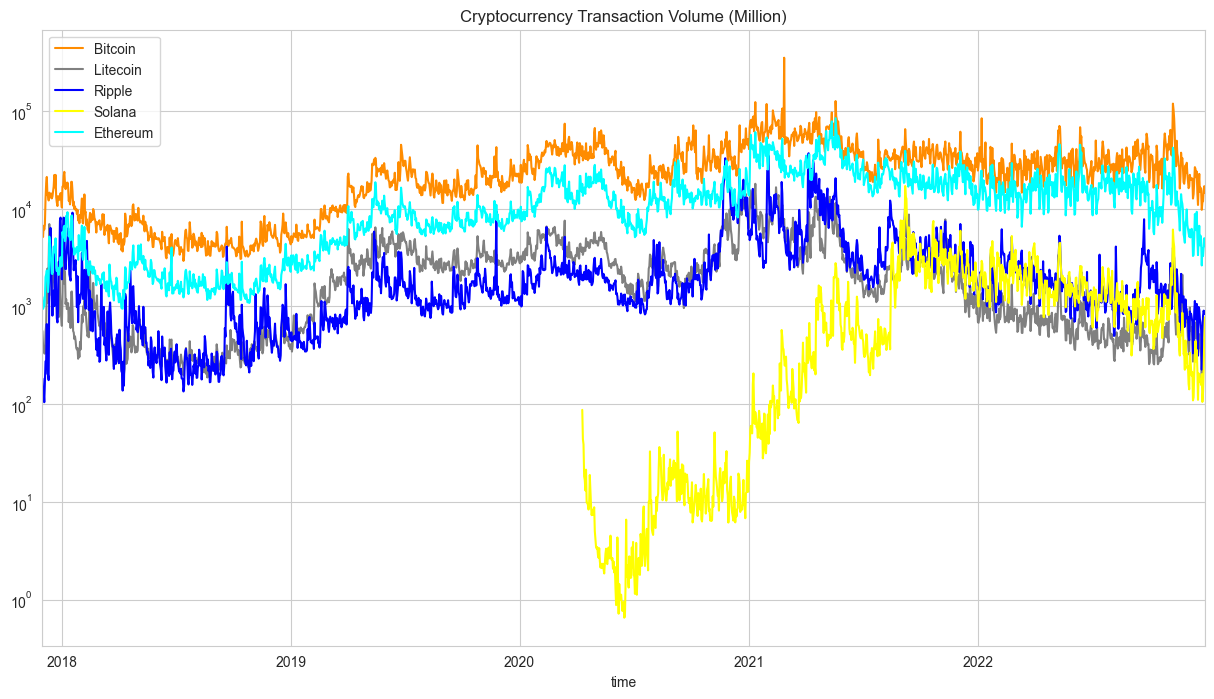

In [127]:
# plot transaction volume
plt.figure(figsize=(15,8))
(bitcoin['Volume']/1000000).plot(color='darkorange', label='Bitcoin')
(litecoin['Volume']/1000000).plot(color='grey', label='Litecoin')
(ripple['Volume']/1000000).plot(color='blue', label='Ripple')
(solana['Volume']/1000000).plot(color='yellow', label='Solana')
(ethereum['Volume']/1000000).plot(color='cyan', label='Ethereum')


plt.legend()
plt.xlabel('time')
plt.yscale('log')
plt.title('Cryptocurrency Transaction Volume (Million)')
plt.show()

    Comme nous pouvons le voir √† la fois sur la capitalisation boursi√®re et sur les graphiques du volume des transactions, rien ne s'est vraiment pass√© avant 2017 (Seul Bitcoin a effectu√© quelques transactions), 2017 a apparemment √©t√© une ann√©e d√©cisive pour l'√©cosyst√®me de la crypto-monnaie.

    On retrouve aussi :

    A mesure que le volume de transactions de BitCoin augmentait, le volume des autres crypto-monnaies augmentait √©galement.

    Il semble que BitCoin m√®ne les changements du march√©.


In [15]:

data.index=[dt.datetime.strptime(
    i, '%Y-%m-%d') for i in data.index]

In [16]:
data_m = data['2017-12-01':'2022-12-29']

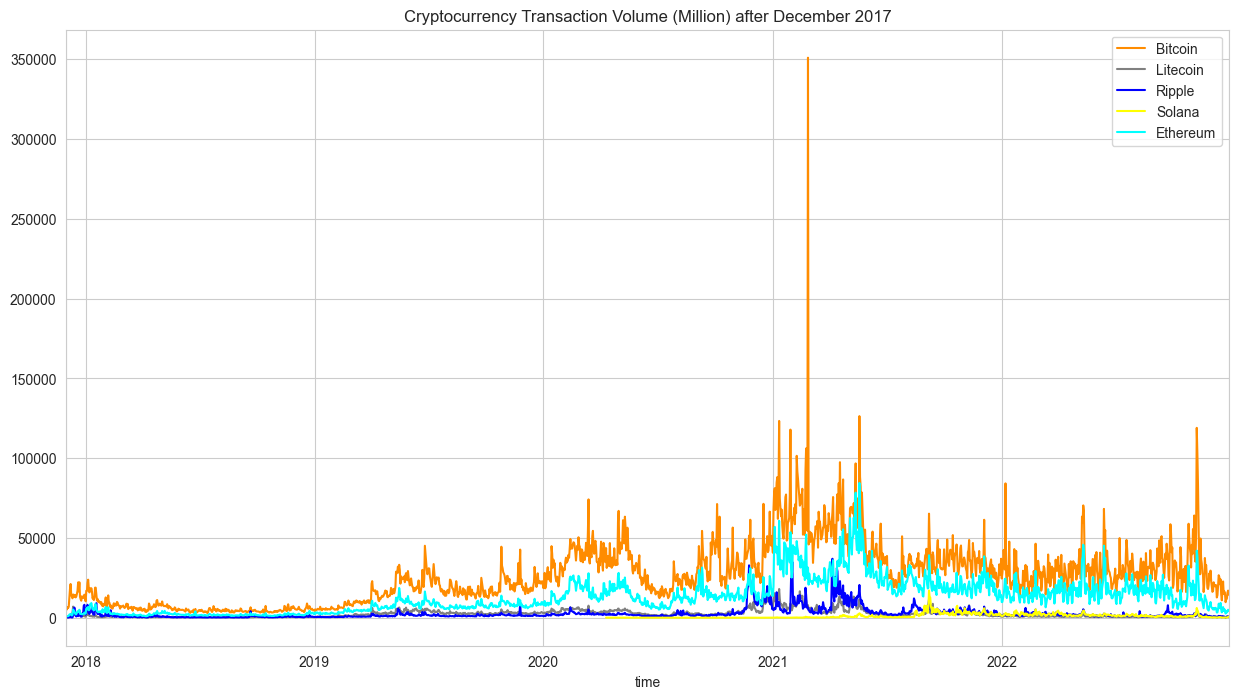

In [126]:
bitcoin = data_m[data_m['symbol']=='BTC']
litecoin = data_m[data_m['symbol']=='LTC']
ripple = data_m[data_m['symbol']=='XRP']
solana = data_m[data_m['symbol']=='SOL']
ethereum = data_m[data_m['symbol']=='ETH']


plt.figure(figsize=(15,8))
(bitcoin['Volume']/1000000).plot(color='darkorange', label='Bitcoin')
(litecoin['Volume']/1000000).plot(color='grey', label='Litecoin')
(ripple['Volume']/1000000).plot(color='blue', label='Ripple')
(solana['Volume']/1000000).plot(color='yellow', label='Solana')
(ethereum['Volume']/1000000).plot(color='cyan', label='Ethereum')


plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Transaction Volume (Million) after December 2017')
plt.show()

In [18]:
data = data['2017-01-01':]
data.head()

slug symbol          Open          High           Low  \
2023-01-21  bitcoin    BTC  22677.427382  23282.347722  22511.833134   
2023-01-20  bitcoin    BTC  21085.372338  22692.357831  20919.125984   
2023-01-19  bitcoin    BTC  20686.745906  21163.012288  20685.381181   
2023-01-18  bitcoin    BTC  21161.050900  21564.502213  20541.544549   
2023-01-17  bitcoin    BTC  21175.833260  21438.659358  20978.533624   

                   Close        Volume    Market Cap  
2023-01-21  22777.625809  3.244228e+10  4.388967e+11  
2023-01-20  22676.551759  2.879915e+10  4.369290e+11  
2023-01-19  21086.793305  2.115285e+10  4.062799e+11  
2023-01-18  20688.780730  3.000563e+10  3.985930e+11  
2023-01-17  21161.519220  2.499998e+10  4.076820e+11

#Fluctuation des prix des crypto-monnaies 

#V√©rifiez l'ouverture, la cl√¥ture, le prix le plus √©lev√© et le plus bas pour chacune des crypto-monnaies.

In [19]:
data['oc_diff']=data['Close']-data['Open']
data.head()

slug symbol          Open          High           Low  \
2023-01-21  bitcoin    BTC  22677.427382  23282.347722  22511.833134   
2023-01-20  bitcoin    BTC  21085.372338  22692.357831  20919.125984   
2023-01-19  bitcoin    BTC  20686.745906  21163.012288  20685.381181   
2023-01-18  bitcoin    BTC  21161.050900  21564.502213  20541.544549   
2023-01-17  bitcoin    BTC  21175.833260  21438.659358  20978.533624   

                   Close        Volume    Market Cap      oc_diff  
2023-01-21  22777.625809  3.244228e+10  4.388967e+11   100.198427  
2023-01-20  22676.551759  2.879915e+10  4.369290e+11  1591.179421  
2023-01-19  21086.793305  2.115285e+10  4.062799e+11   400.047399  
2023-01-18  20688.780730  3.000563e+10  3.985930e+11  -472.270170  
2023-01-17  21161.519220  2.499998e+10  4.076820e+11   -14.314040

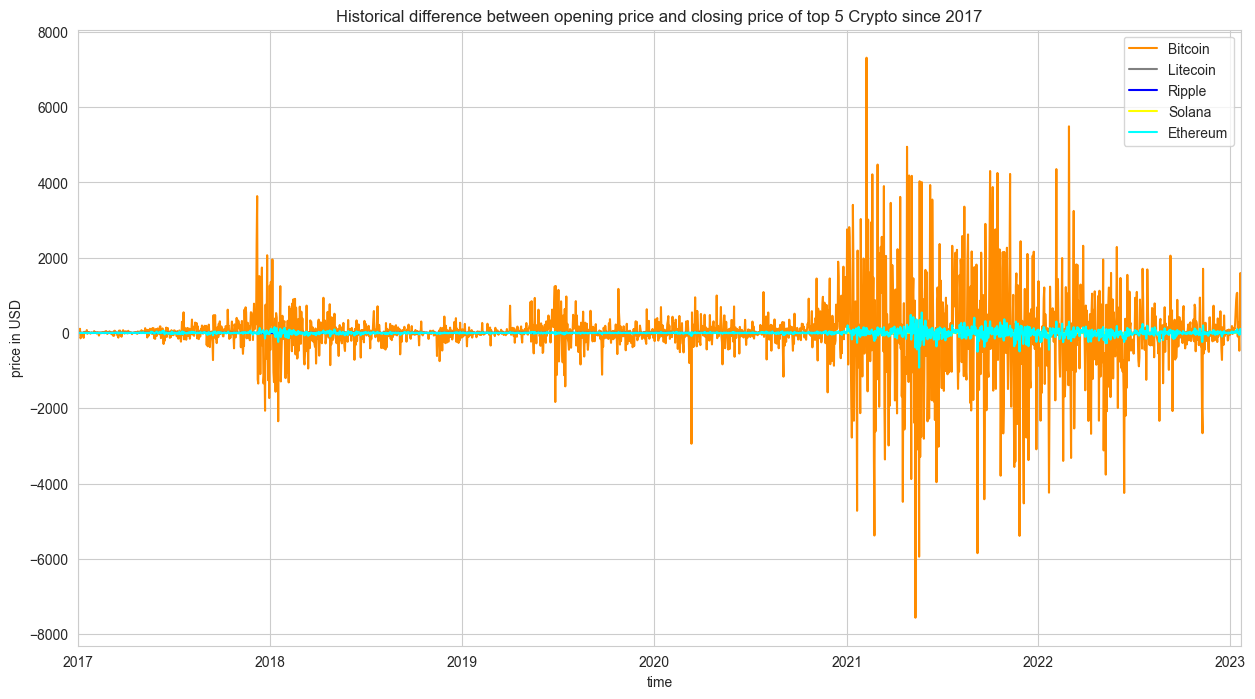

In [20]:
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']
ripple = data[data['symbol']=='XRP']
solana = data[data['symbol']=='SOL']
ethereum = data[data['symbol']=='ETH']


plt.figure(figsize=(15,8))
(bitcoin['oc_diff']).plot(color='darkorange', label='Bitcoin')
(litecoin['oc_diff']).plot(color='grey', label='Litecoin')
(ripple['oc_diff']).plot(color='blue', label='Ripple')
(solana['oc_diff']).plot(color='yellow', label='Solana')
(ethereum['oc_diff']).plot(color='cyan', label='Ethereum')


plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical difference between opening price and closing price of top 5 Crypto since 2017')
plt.legend()
plt.show()

    En tra√ßant la diff√©rence entre le cours d'ouverture et le cours de cl√¥ture quotidiens, nous avons constat√© que :

       Le cours d'ouverture et le cours de cl√¥ture quotidiens de BitCoin et d'Etherium varient le plus, les diff√©rences peuvent aller de 1000 √† plus de 3000 dollars.
    Le reste des crypto-monnaies que nous avons s√©lectionn√©es a tendance √† √™tre assez stable

In [21]:
# Average difference for each cryptocurrency
ave_diff={'bitcoin':[(bitcoin['oc_diff']).mean()],
          'litecoin':[(litecoin['oc_diff']).mean()],
          'ripple':[(ripple['oc_diff']).mean()],
          'solana':[(solana['oc_diff']).mean()],
          'ethereum':[(ethereum['oc_diff']).mean()]}
pd.DataFrame(ave_diff, index=['avg.diff'])

bitcoin  litecoin    ripple    solana  ethereum
avg.diff  7.813758  0.012866  0.000185 -0.003094  0.522374

            Pour mieux comprendre la diff√©rence entre le cours d'ouverture et le cours de cl√¥ture quotidiens, nous avons calcul√© la diff√©rence moyenne

In [22]:
btc = bitcoin[['Close']]
btc.columns = ['BTC']
print(btc.head(10))
btc_ma=btc.rolling(window=5).mean()
print(btc_ma.head(10))
ltc = litecoin[['Close']]
ltc.columns = ['LTC']
ltc_ma=ltc.rolling(window=5).mean()

xrp = ripple[['Close']]
xrp.columns = ['XRP']
xrp_ma=xrp.rolling(window=5).mean()

sol = solana[['Close']]
sol.columns = ['SOL']
sol_ma=sol.rolling(window=5).mean()

eth = ethereum[['Close']]
eth.columns = ['ETH']
eth_ma=eth.rolling(window=5).mean()



# create matrix of close price only for later use
Close = pd.concat([btc,ltc,xrp,sol,eth], axis=1)
Close_ma = pd.concat([btc_ma,ltc_ma,xrp_ma,sol_ma,eth_ma], axis=1)
Close_ma.tail()

                     BTC
2023-01-21  22777.625809
2023-01-20  22676.551759
2023-01-19  21086.793305
2023-01-18  20688.780730
2023-01-17  21161.519220
2023-01-16  21169.632781
2023-01-15  20880.799202
2023-01-14  20976.299796
2023-01-13  19909.574625
2023-01-12  18869.588055
                     BTC
2023-01-21           NaN
2023-01-20           NaN
2023-01-19           NaN
2023-01-18           NaN
2023-01-17  21678.254165
2023-01-16  21356.655559
2023-01-15  20997.505048
2023-01-14  20975.406346
2023-01-13  20819.565125
2023-01-12  20361.178892


BTC        LTC       XRP        SOL         ETH
2023-01-17  21678.254165  86.586581  0.395565  23.067515  1584.55639
2023-01-18           NaN        NaN       NaN        NaN         NaN
2023-01-19           NaN        NaN       NaN        NaN         NaN
2023-01-20           NaN        NaN       NaN        NaN         NaN
2023-01-21           NaN        NaN       NaN        NaN         NaN

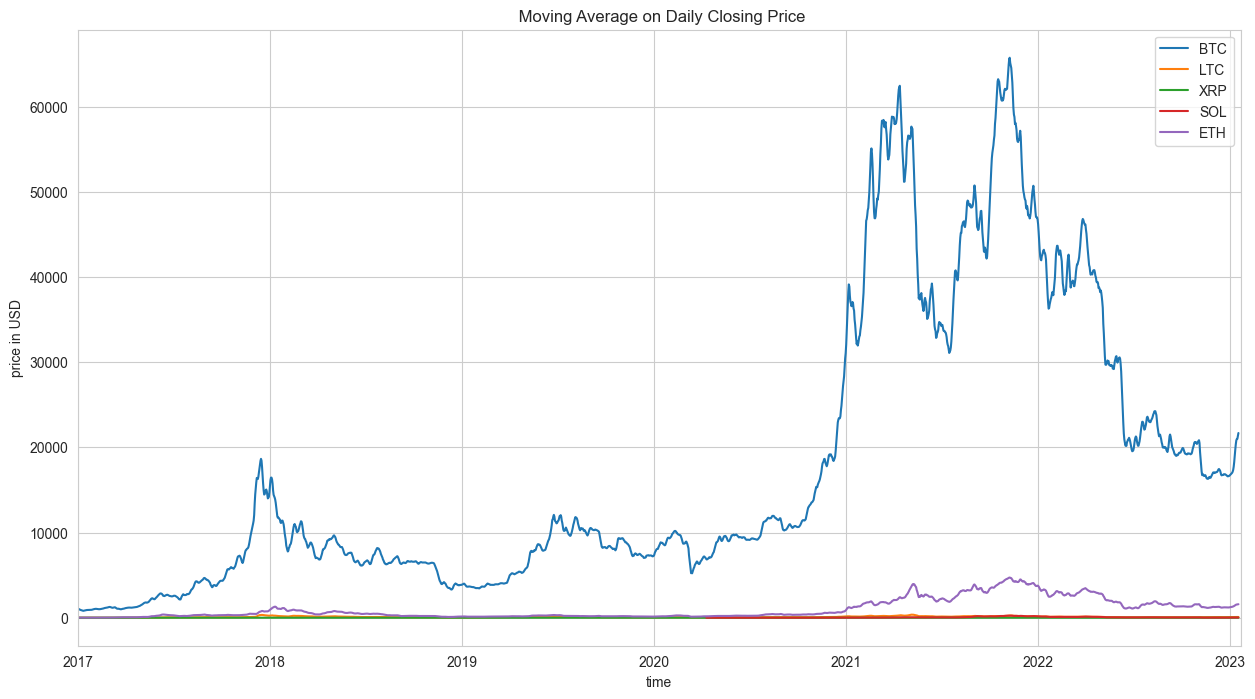

In [223]:
# plot moving average for closing price for cryptocurrencies
Close_ma.plot(figsize=(15,8))
plt.title(' Moving Average on Daily Closing Price')
plt.xlabel('time')
plt.ylabel('price in USD')
plt.show()

    Les prix du BitCoin et de l'Etherium fluctuent un peu plus que le reste des crypto-monnaies

    √Ä partir de janvier 2018, il semble que le prix de BitCoin ait consid√©rablement baiss√© mais a commenc√© √† remonter vers 2021.

        Le Bitcoin a chutt√© a partir du mois de d√©cembre 2021 Cependant, il est difficile de dire si BitCoin reviendra √† son apog√©e.

In [24]:
data[data["symbol"]=="BTC"]["High"].max()

68789.62593892214

In [25]:
def getMax(coin):
    info = data[data["symbol"]==coin]["High"].values.max()
    return info,data.loc[data['High'].isin([info])].index
getMax("BTC")

(68789.62593892214,
 DatetimeIndex(['2021-11-10'], dtype='datetime64[ns]', freq=None))

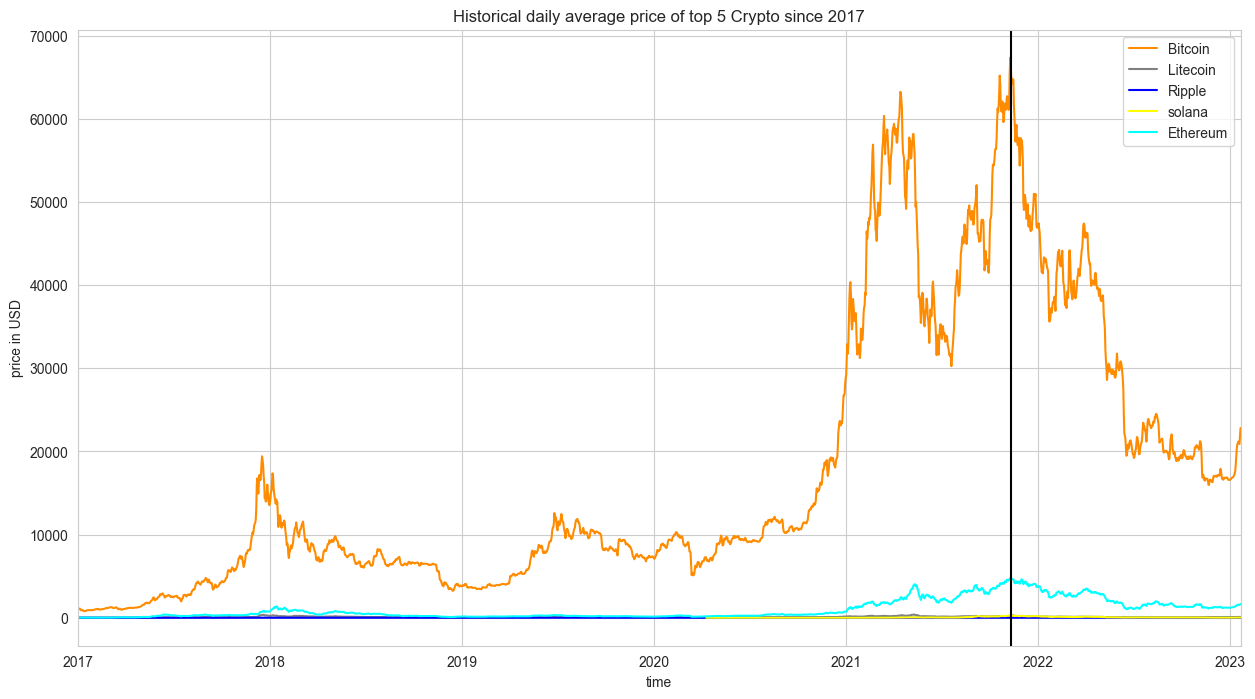

In [224]:
# calculate daily average price
data['daily_avg'] = (data['Open'] + data['High'] + data['Low'] + data['Close']) / 4
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']
ripple = data[data['symbol']=='XRP']
solana = data[data['symbol']=='SOL']
ethereum = data[data['symbol']=='ETH']


plt.figure(figsize=(15,8))
(bitcoin['daily_avg']).plot(color='darkorange', label='Bitcoin')
(litecoin['daily_avg']).plot(color='grey', label='Litecoin')
(ripple['daily_avg']).plot(color='blue', label='Ripple')
(solana['daily_avg']).plot(color='yellow', label='solana')
(ethereum['daily_avg']).plot(color='cyan', label='Ethereum')

plt.axvline(dt.datetime(2021, 11, 10),color='black')
plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical daily average price of top 5 Crypto since 2017')
plt.legend()
plt.show()

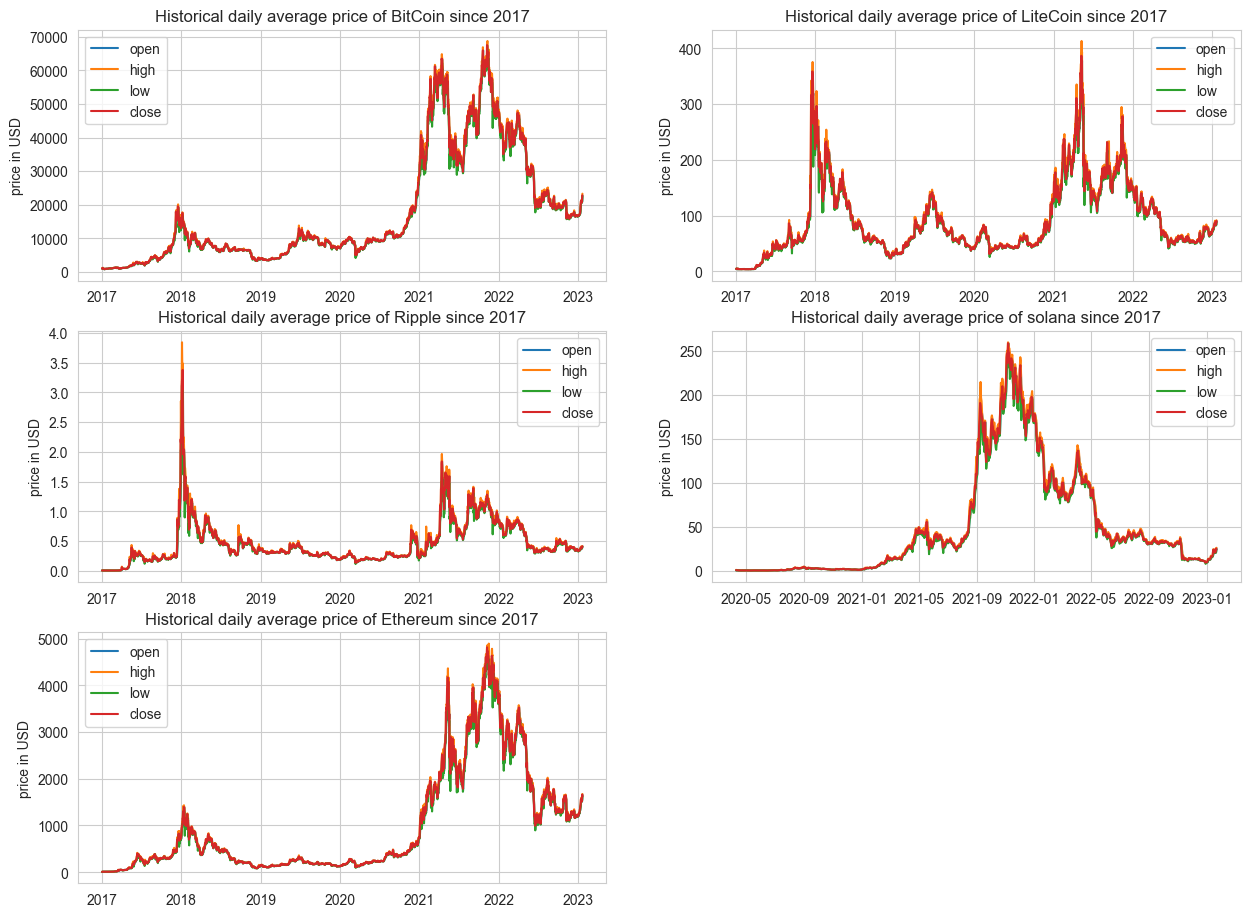

In [219]:
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
plt.plot(bitcoin[['Open','High','Low','Close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of BitCoin since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,2)
plt.plot(litecoin[['Open','High','Low','Close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of LiteCoin since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,3)
plt.plot(ripple[['Open','High','Low','Close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Ripple since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,4)
plt.plot(solana[['Open','High','Low','Close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of solana since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,5)
plt.plot(ethereum[['Open','High','Low','Close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Ethereum since 2017')
plt.legend(['open','high','low','close'])




plt.show()

Un grand nombre des graphes ci-dessus ne montrent pas beaucoup de diff√©rences entre les diff√©rents prix,
mais comme nous l'avons d√©couvert pr√©c√©demment √† partir du volume des transactions et de l'√©volution du prix moyen,
une tendance tr√®s √©vidente est que lorsque le prix ou le volume de Bitcoin augmente, le prix
et le volume des autres crypto-monnaies ont √©galement augment√©.
 C'est probablement parce que le succ√®s du Bitcoin ouvre la voie aux √©cosyst√®mes de cryptomonnaies et attire de plus en plus d'investisseurs.
 En outre, le prix d'achat √©lev√© de Bitcoin pourrait d√©clencher des achats pour ses alternatives moins ch√®res.

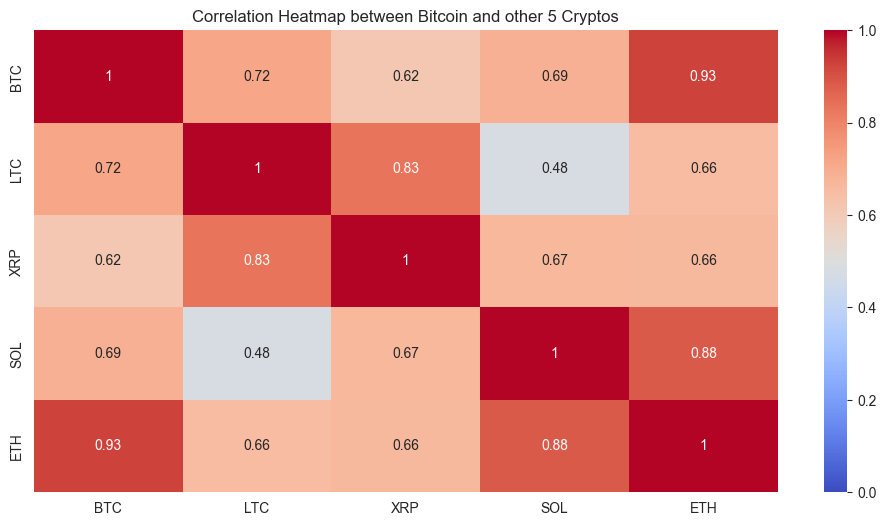

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(Close.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap between Bitcoin and other 5 Cryptos')
plt.show()

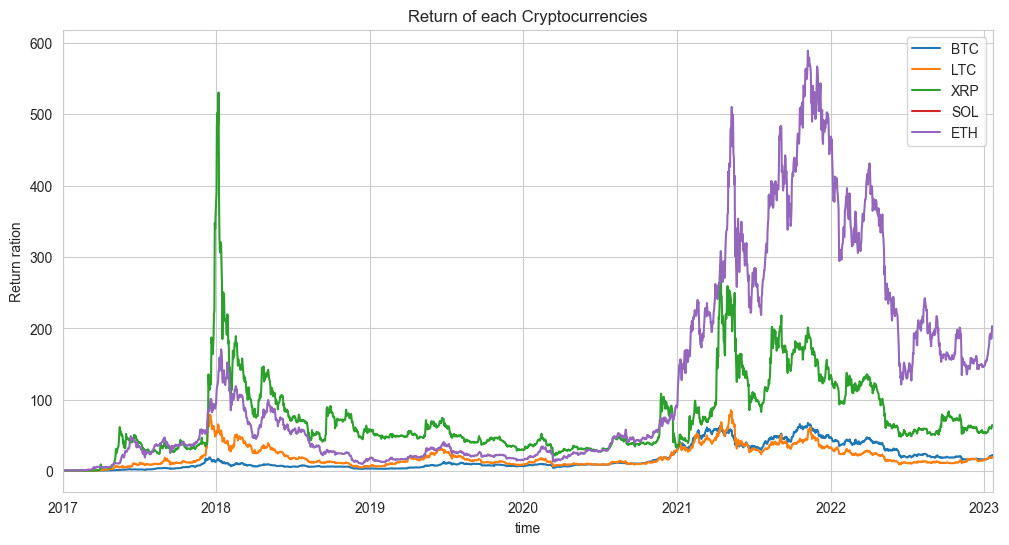

In [29]:
#return ratio = current value of the cryptocurrency / initial value of the cryptocurrency
returns = Close.apply(lambda x: x/x[0])
returns.plot(figsize=(12,6))
plt.ylabel('Return ration')
plt.xlabel('time')
plt.title('Return of each Cryptocurrencies')
plt.show()

#Il semble que depuis 2017, Ripple (XRP) et Ethereum (ETH) aient le taux de rendement le plus √©lev√©, tandis que le reste des crypto-monnaies reste assez stable.

#Investir dans Ripple et Ethereum pourrait obtenir de meilleurs rendements mais depuis 2022, la tendance est √† la baisse.

#Investir dans des crypto-monnaies populaires comme BitCoin et LiteCoin pourrait encore valoir la peine d'essayer car leur prix est assez stable et il semble y avoir une tendance √† la hausse.



In [30]:
data_split =data.copy()


Bitcoin.

Depuis le lancement de Bitcoin en 2008, des centaines de projets similaires bas√©s sur la technologie blockchain ont vu le jour. Nous appelons ces crypto-monnaies (√©galement des pi√®ces ou des cryptos dans l'argot Internet). Certaines sont extr√™mement pr√©cieuses de nos jours, et d'autres pourraient devenir extr√™mement pr√©cieuses √† l'avenir.
En fait, le 6 d√©cembre 2017, Bitcoin a une capitalisation boursi√®re sup√©rieure √† 200 milliards de dollars.


L'augmentation √©tonnante de la capitalisation boursi√®re de BitCoin en 2017.

*- AVERTISSEMENT : Le march√© des crypto-monnaies est exceptionnellement volatil et tout argent que vous y investissez peut dispara√Ætre dans les airs. certaine crypto-monnaies peuvent √™tre des escroqueries similaires aux sch√©mas de Ponzi ou avoir de nombreux autres probl√®mes (sur√©valuation, technique, etc.). S'il vous pla√Æt ne confondez pas cela avec des conseils d'investissement. *

Cela dit, nous allons nous interess√© dans la suite de ce projet uniquement au Bitcoin 

<AxesSubplot:xlabel='slug', ylabel='Market Cap'>

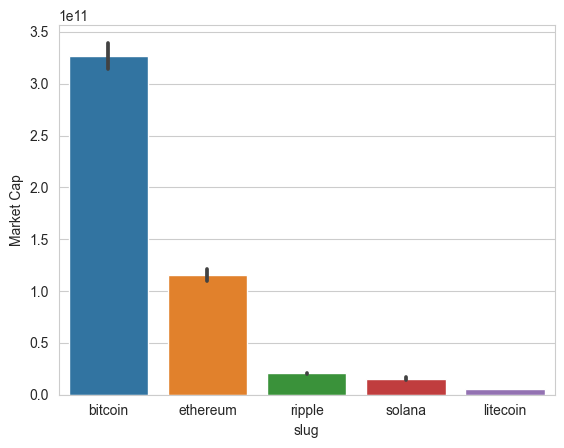

In [31]:

sns.barplot(y="Market Cap",x="slug",data=data)

In [32]:
data_split= data_split.sort_index()

In [33]:
coin="BTC"

date_specified = data_split.loc["2021-10-10":"2023-1-17"]
date_specified_coin = date_specified[date_specified["symbol"]==coin]

In [34]:
date_specified_coin.head()

slug symbol          Open          High           Low  \
2021-10-10  bitcoin    BTC  54952.821251  56401.304241  54264.256389   
2021-10-11  bitcoin    BTC  54734.124841  57793.039249  54519.765520   
2021-10-12  bitcoin    BTC  57526.832011  57627.878602  54477.974468   
2021-10-13  bitcoin    BTC  56038.256788  57688.660104  54370.973228   
2021-10-14  bitcoin    BTC  57372.832079  58478.735499  56957.076136   

                   Close        Volume    Market Cap      oc_diff  \
2021-10-10  54771.579184  3.952779e+10  1.031910e+12  -181.242067   
2021-10-11  57484.789465  4.263733e+10  1.083079e+12  2750.664625   
2021-10-12  56041.056838  4.108376e+10  1.055926e+12 -1485.775173   
2021-10-13  57401.097527  4.168425e+10  1.081612e+12  1362.840739   
2021-10-14  57321.525280  3.661579e+10  1.080160e+12   -51.306799   

               daily_avg  
2021-10-10  55097.490266  
2021-10-11  56132.929769  
2021-10-12  56418.435480  
2021-10-13  56374.746912  
2021-10-14  57532.542248

Voici le graphique mettant en √©vidence le prix de cl√¥ture de l'actif :

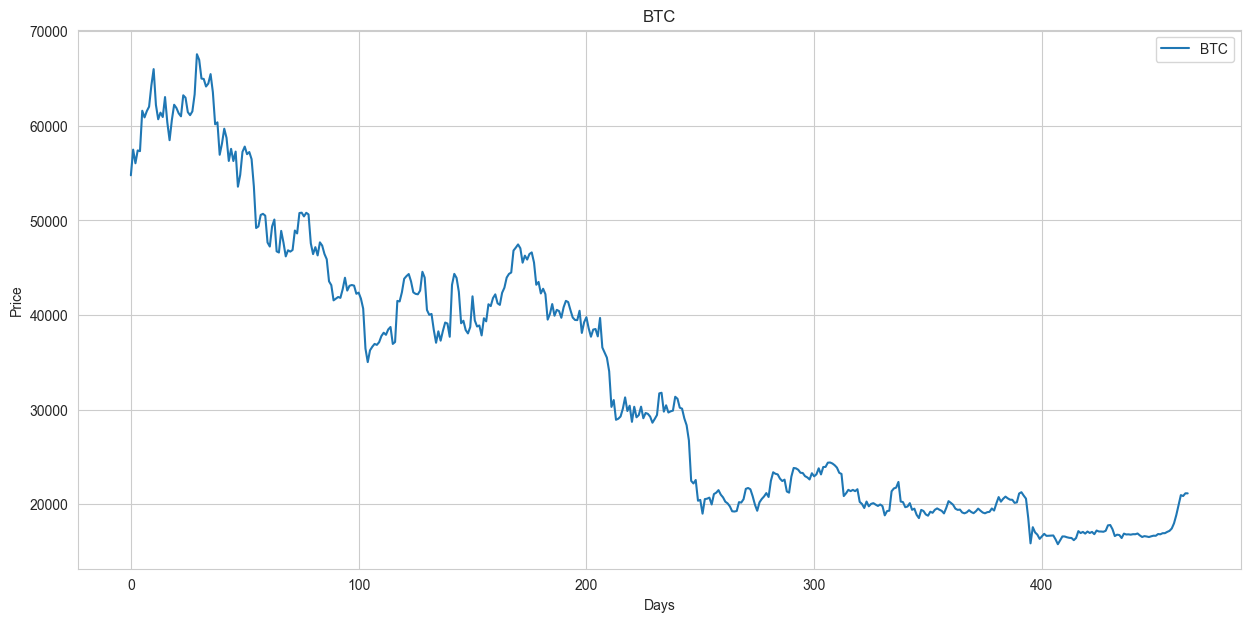

In [36]:
# Plot the close price data
series = date_specified_coin['Close']
series.index = np.arange(series.shape[0])

plt.figure(figsize=(15, 7))
plt.title("BTC")

plt.xlabel('Days')
plt.ylabel('Price')

plt.plot(series, label="BTC")

plt.legend()
plt.show()


Maintenant que nous avons toutes nos donn√©es en place, la prochaine √©tape consiste √† identifier les hauts et les bas  dans le graphique de prix ci-dessus. Une fa√ßon plus simple de le faire est d'identifier les points de minima locaux et de maxima locaux.


Pour identifier les points minima et maxima locaux, nous devrons d'abord lisser le graphique des prix. Ceci peut √™tre r√©alis√© en utilisant la fonction savgol.filter de la biblioth√®que scipy.signal.

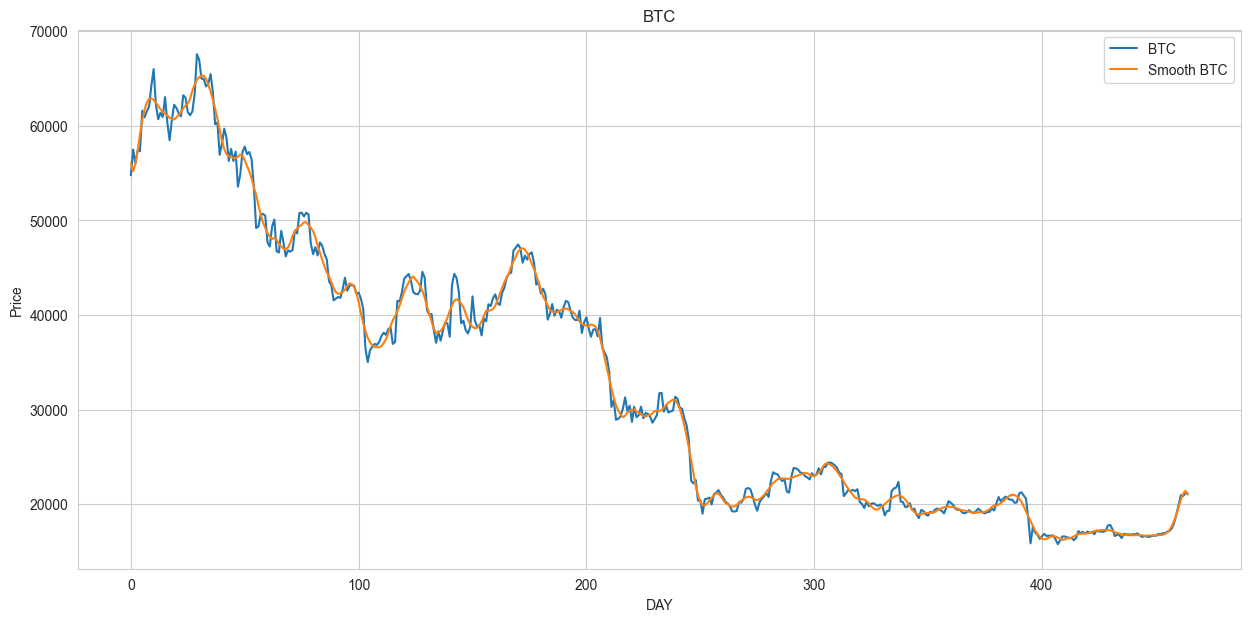

In [37]:


# To find amount of data in months
month_diff = series.shape[0] // 30
# We need value to be greater than 0
if month_diff == 0:
    month_diff = 1

# Algo to determine smoothness
smooth = int(2 * month_diff + 3)

# Smooth price data
points = savgol_filter(series, smooth, 7)

# Plot the smooth price graph over default price graph
plt.figure(figsize=(15,7))
plt.title("BTC")

plt.xlabel('DAY')
plt.ylabel('Price')

# Close price data
plt.plot(series, label="BTC")

# Smooth close price data
plt.plot(points, label=f'Smooth {"BTC"}')

plt.legend()
plt.show()

Ensuite, nous tracerons et comparerons le graphique de prix de cl√¥ture normal avec le graphique de prix de cl√¥ture liss√©.


Pour identifier les points minima locaux et maxima locaux, nous avons cr√©√© deux fonctions √† savoir : la fonction pythg() et la fonction loc_min_max().

In [38]:

# Pythagoras function to calculate distance between two points
def pythg(pt1, pt2):
    a_sq = (pt2[0] - pt1[0]) ** 2
    b_sq = (pt2[1] - pt1[1]) ** 2
    return sqrt(a_sq + b_sq)


# Function to calculate local minima and maxima points
def loc_min_max(points):
    loc_minima = []
    loc_maxima = []
    prev_pts = [(0, points[0]), (1, points[1])]
    for i in range(1, len(points) - 1):
        append_to = ''
        if points[i-1] > points[i] < points[i+1]:
            append_to = 'min'
        elif points[i-1] < points[i] > points[i+1]:
            append_to = 'max'
        if append_to:
            if loc_minima or loc_maxima:
                prev_distance = pythg(prev_pts[0], prev_pts[1]) * 0.5
                curr_distance = pythg(prev_pts[1], (i, points[i]))
                if curr_distance >= prev_distance:
                    prev_pts[0] = prev_pts[1]
                    prev_pts[1] = (i, points[i])
                    if append_to == 'min':
                        loc_minima.append((i, points[i]))
                    else:
                        loc_maxima.append((i, points[i]))
            else:
                prev_pts[0] = prev_pts[1]
                prev_pts[1] = (i, points[i])
                if append_to == 'min':
                    loc_minima.append((i, points[i]))
                else:
                    loc_maxima.append((i, points[i]))
                    
    return loc_minima, loc_maxima

# Store the local minima and maxima points
loc_minima, loc_maxima = loc_min_max(points)
minima_pts = np.array(loc_minima)
maxima_pts = np.array(loc_maxima)

La fonction loc_min_max() boucle sur tous les points allant de l'indice 1 √† -1.

Si un point donn√© est plus petit que le point pr√©c√©dent et le point suivant, il s'agit d'un minimum local. De m√™me, si un point est sup√©rieur au point pr√©c√©dent et au point suivant, il est appel√© maximum local.

Vous remarquerez que nous pouvons avoir de nombreux minima locaux et maxima locaux si nous suivons la logique ci-dessus. Pour √©viter de rencontrer ce probl√®me, nous avons d√©fini la fonction pythg(). Nous utilisons la fonction pythg() pour calculer la distance entre le point actuel et le point pr√©c√©dent ainsi que la distance entre le point actuel et le point suivant.

Nous s√©lectionnons un point comme minima local ou maxima local uniquement si la distance entre le point actuel et le point suivant est sup√©rieure √† la moiti√© de la distance entre les points actuel et pr√©c√©dent.

Ce qui suit est le r√©sultat trac√© des points minima et maxima locaux calcul√©s √† l'aide des fonctions ci-dessus.

Ensuite, nous d√©finirons une fonction appel√©e line_mse() qui calcule l'erreur quadratique moyenne de chaque ligne.

In [39]:
# The line_mse() function computes and returns the mean squared error for
# the distance of all points from the line passing through points pt1 and pt2.

norm = np.linalg.norm

# Function takes two points pt1, pt2 and the minima/maxima dataset as input.
def line_mse(pt1, pt2, data):
    dist = 0
    dist_sq = 0
    sum_dist_sq = 0
    mean_sq_err = 0
    length = len(data)

    for pt3 in range(0, length):
            p1 = data[pt1]
            p2 = data[pt2]
            p3 = data[pt3]           
            
            # To calculate perpendicular distance of a point from line passing through pt1 and pt2
            dist = np.abs(norm(np.cross(p2-p1, p1-p3)))/norm(p2-p1)            
            # Squared error of a point from line passing through pt1 and pt2
            dist_sq = dist**2
            # Sum of squared errors of all points from line passing through pt1 and pt2
            sum_dist_sq = sum_dist_sq + dist_sq
            
    # Mean squared error formula applied
    mean_sq_err = sum_dist_sq / length
    return (mean_sq_err)

La valeur d'erreur quadratique moyenne nous aide √† √©valuer l'√©cart global de tous les points pr√©sents dans l'ensemble de donn√©es minima_pts ou maxima_pts par rapport √† la ligne de support ou de r√©sistance identifi√©e.

Dans la prochaine √©tape, nous essaierons d'identifier toutes les lignes de support et de r√©sistance potentielles.

Une ligne de support potentielle serait une ligne qui relie deux bas de swing ou plus (points minima locaux) tandis qu'une ligne de r√©sistance potentielle serait toute ligne qui relie deux hauts ou plus (points maxima locaux)

Nous utiliserons la fonction s_r_lines() pour r√©cup√©rer les coordonn√©es de toutes les lignes possibles passant par au moins deux points connus √† partir de nos ensembles de donn√©es minima_pts et maxima_pts respectivement.

In [40]:
# The s_r_lines() function identifies and returns all potential support and 
# resistance line coordinates along with its corresponding mean squared error value.

def s_r_lines(data):
    lines = []
    for pt1 in range(0, len(data) - 1):
        for pt2 in range(0, len(data)):
            if pt1 != pt2:
                mse_val = line_mse(pt1, pt2, data)
                lines.append((data[pt1], data[pt2], mse_val))
    return lines

# Compute and store data of potential support and resistance lines
support_lines = s_r_lines(minima_pts)
resistance_lines = s_r_lines(maxima_pts)

Les coordonn√©es et la valeur MSE de toutes les lignes de support potentielles sont enregistr√©es dans le tableau support_lines. De m√™me, les valeurs des lignes de r√©sistance potentielles sont enregistr√©es dans le tableau nomm√© resistance_lines.

Ensuite, nous utiliserons la fonction line_least_mse() pour parcourir toutes les donn√©es pr√©sentes respectivement dans les tableaux support_lines et resistance_lines et r√©cup√©rer la ligne qui a la plus petite valeur MSE.

In [41]:
# The 'line_least_mse()' function returns data for the 
# line which has the least mean squared error value.

def line_least_mse(data):
    best_line = []
    # Temporarily assign value of first line in dataset as 'least_mse'
    least_mse = data[0][2]
    
    # Compare MSE values of all lines present in the dataset
    for r in range (0, len(data)):
            if data[r][2] < least_mse:
                
                # Assign the current value to 'least_mse' if 
                # the current value is less than existing value
                least_mse = data[r][2]
                
                # Store data of the line with least mse value
                best_line = data[r]
                
    return best_line

# Support and resistance lines having least MSE value
support = line_least_mse(support_lines)
resistance = line_least_mse(resistance_lines)

Les donn√©es correspondant aux meilleures lignes de support et de r√©sistance sont affich√©es ci-dessous

In [42]:
support
# Values are in the format: Pt1(x1,y1), Pt2(x2,y2), MSE Value

(array([  134.        , 38109.15034452]),
 array([  251.        , 19888.70910759]),
 852.8977903406983)

In [43]:
resistance
# Values are in the format: Pt1(x1,y1), Pt2(x2,y2), MSE Value

(array([9.0000000e+00, 6.2899746e+04]),
 array([  156.        , 40460.15396811]),
 721.1810115869962)

In [44]:
# Assign the x and y co-ordinates

# For the support line
s_x1 = support[0][0]
s_x2 = support[1][0]
s_y1 = support[0][1]
s_y2 = support[1][1]

# For the resistance line
r_x1 = resistance[0][0]
r_x2 = resistance[1][0]
r_y1 = resistance[0][1]
r_y2 = resistance[1][1]

Lastly, we will plot the support and resistance lines on the asset‚Äôs close price graph.


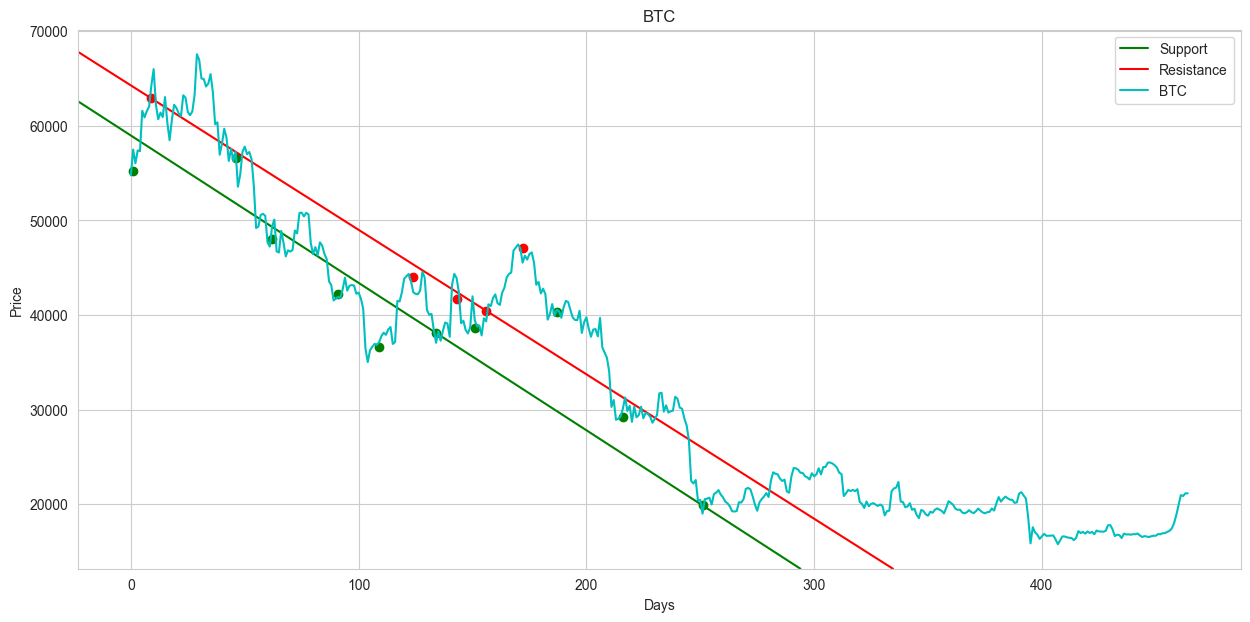

In [45]:
plt.figure(figsize=(15,7))

plt.title("BTC")
plt.xlabel('Days')
plt.ylabel('Price')

# Support line
plt.axline((s_x1,s_y1), (s_x2,s_y2), label='Support', c='g')

# Resistance line
plt.axline((r_x1,r_y1), (r_x2,r_y2), label='Resistance', c='r')

# Close price data
plt.plot(series, label="BTC", c='c')

for pt in loc_minima:
    plt.scatter(pt[0], pt[1], c='g')
for pt in loc_maxima:
    plt.scatter(pt[0], pt[1], c='r')
    
plt.legend()
plt.show()

 Le march√© des cryptos a v√©cu une ann√©e 2022 particuli√®rement compliqu√©e. La plupart des cryptomonnaies sont en baisse depuis plusieurs mois d√©j√†. Le cours du Bitcoin, par exemple, a perdu environ 60 % de sa valeur depuis le d√©but de l'ann√©e et se situe actuellement aux alentours de 17 000 dollars US.

# Monte Carlo Simulation

# Qu'est-ce qu'une simulation de Monte-Carlo ?

Il s'agit d'une technique utilis√©e pour comprendre l'impact du risque et de l'incertitude dans les mod√®les de pr√©diction et de pr√©vision. Le mod√®le est tr√®s utile pour √©valuer le risque associ√© √† l'actif, car il produit des r√©sultats et des possibilit√©s extr√™mes, et il peut vous donner une id√©e de l'orientation potentielle du prix de l'actif √† l'avenir.

Dans cet exemple, je vais cr√©er une simulation de 400 r√©sultats futurs potentiels pour l'√©volution du prix de Bitcoin pour les 100 prochains jours.

In [46]:
BTC_df_close=date_specified_coin.filter(['Close'])

In [47]:

returns = BTC_df_close.pct_change()
meanReturns = returns.mean()
covMatrix = returns.cov()


In [48]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

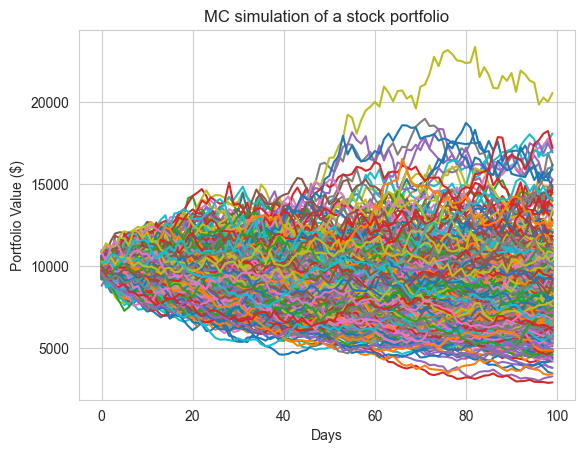

In [49]:
mc_sims = 400 # number of simulations
T = 100 #timeframe in days
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000
for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [50]:
date_specified_coin.index.names = ['Date']
date_specified_coin.reset_index()


Date     slug symbol          Open          High           Low  \
0   2021-10-10  bitcoin    BTC  54952.821251  56401.304241  54264.256389   
1   2021-10-11  bitcoin    BTC  54734.124841  57793.039249  54519.765520   
2   2021-10-12  bitcoin    BTC  57526.832011  57627.878602  54477.974468   
3   2021-10-13  bitcoin    BTC  56038.256788  57688.660104  54370.973228   
4   2021-10-14  bitcoin    BTC  57372.832079  58478.735499  56957.076136   
..         ...      ...    ...           ...           ...           ...   
460 2023-01-13  bitcoin    BTC  18868.905938  19964.322728  18753.164262   
461 2023-01-14  bitcoin    BTC  19910.536657  21075.141830  19907.828464   
462 2023-01-15  bitcoin    BTC  20977.484195  20993.748696  20606.987238   
463 2023-01-16  bitcoin    BTC  20882.223877  21360.874279  20715.746214   
464 2023-01-17  bitcoin    BTC  21175.833260  21438.659358  20978.533624   

            Close        Volume    Market Cap      oc_diff     daily_avg  
0    54771.579184  3.952779e+10  1.031910e+12  -181.242067  55097.490266  
1    57484.789465  4.263733e+10  1.083079e+12  2750.664625  56132.929769  
2    56041.056838  4.108376e+10  1.055926e+12 -1485.775173  56418.435480  
3    57401.097527  4.168425e+10  1.081612e+12  1362.840739  56374.746912  
4    57321.525280  3.661579e+10  1.080160e+12   -51.306799  57532.542248  
..            ...           ...           ...          ...           ...  
460  19909.574625  2.922503e+10  3.834832e+11  1040.668687  19373.991888  
461  20976.299796  3.896778e+10  4.040522e+11  1065.763139  20467.451687  
462  20880.799202  1.929841e+10  4.022347e+11   -96.684993  20864.754833  
463  21169.632781  2.679249e+10  4.078182e+11   287.408904  21032.119288  
464  21161.519220  2.499998e+10  4.076820e+11   -14.314040  21188.636366  

[465 rows x 11 columns]

# Prediction using Machine learning 

In [51]:
BTC= date_specified_coin.copy()

In [52]:
BTC=BTC.drop(['slug'], axis=1)

In [53]:
coins=""
kwargs = {'close_off_high': lambda x: 2*(x[coins+'High']- x[coins+'Close'])/(x[coins+'High']-x[coins+'Low'])-1,
        'volatility': lambda x: (x[coins+'High']- x[coins+'Low'])/(x[coins+'Open'])}
BTC = BTC.assign(**kwargs)

In [54]:
BTC['daily_avg_After_Month']=BTC['daily_avg'].shift(-30)
BTC = BTC.sort_index()
X_BTC = BTC.dropna().drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)
y_BTC = BTC.dropna()['daily_avg_After_Month']

X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = train_test_split(X_BTC, y_BTC, test_size=0.2, random_state=43)
X_forecast_BTC =  BTC.tail(30).drop(['daily_avg_After_Month','symbol','daily_avg'], axis=1)

In [55]:
BTC = BTC.dropna()
y_BTC

Date
2021-10-10    67358.491093
2021-10-11    65986.577425
2021-10-12    64922.088975
2021-10-13    64203.662568
2021-10-14    64211.765101
                  ...     
2022-12-14    19373.991888
2022-12-15    20467.451687
2022-12-16    20864.754833
2022-12-17    21032.119288
2022-12-18    21188.636366
Name: daily_avg_After_Month, Length: 435, dtype: float64

In [229]:
# define regression function
def regression(X_train, X_test, y_train, y_test):
    Regressor = {
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        
        'ExtraTrees Regressor': ExtraTreesRegressor(n_estimators=500, min_samples_split=5),
        
        
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train)
    
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, clf.predict(X_test)):.2f}')
        print(f'MSE: {mean_squared_error(y_test, clf.predict(X_test)):.2f}')
        print()
     

In [230]:
# Bitcoin (BTC)
print('Bitcoin (BTC):')
regression(X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC)


Bitcoin (BTC):
Random Forest Regressor
R2: 0.93
MAE: 2534.95
MSE: 12255747.61

ExtraTrees Regressor
R2: 0.94
MAE: 2350.13
MSE: 10096123.59



In [58]:
# Liste des algorithmes √† entra√Æner

seed = 123

models = []

models.append(('LR', {'model':LinearRegression()}))
models.append(('LASSO', {'model':Lasso()}))
models.append(('EN', {'model':ElasticNet()}))
models.append(('KNN', {'model':KNeighborsRegressor()}))
models.append(('CART', {'model':DecisionTreeRegressor(random_state = seed)}))
models.append(('SVR', {'model':SVR()}))

models.append(('ABR', {'model':AdaBoostRegressor(random_state = seed)}))
models.append(('XGBOOST', {'model':XGBRegressor(random_state=seed)}))
models.append(('GBR', {'model':GradientBoostingRegressor(random_state = seed)}))

models.append(('RFR', {'model':RandomForestRegressor(random_state = seed)}))
models.append(('ETR', {'model':ExtraTreesRegressor(random_state = seed)}))

algos_ml = dict(models)

num_folds = 5
scoring = 'neg_mean_squared_error'
kfold_results = []

for model_name in algos_ml.keys():
    
   
    
    fitted_model = algos_ml[model_name]['model'].fit(X_train_BTC, y_train_BTC)
    algos_ml[model_name]['RMSE test'] = np.sqrt(mean_squared_error(y_test_BTC, fitted_model.predict(X_test_BTC)))
    algos_ml[model_name]['R¬≤ test'] = r2_score(y_test_BTC, fitted_model.predict(X_test_BTC))
    
    
# Meilleur affichage sous forme de tableau

results_metrics = pd.DataFrame.from_dict(
    algos_ml, 
    'index')[[ 'RMSE test','R¬≤ test']]

with pd.option_context('display.precision', 3):
    best_print = results_metrics.sort_values(by='RMSE test', ascending=True)

best_print

RMSE test   R¬≤ test
ETR       3133.506597  0.943573
RFR       3337.872802  0.935973
KNN       3483.652680  0.930258
ABR       3566.946160  0.926883
GBR       3666.248563  0.922756
LR        3917.677846  0.911798
XGBOOST   4086.594143  0.904028
LASSO     4347.995286  0.891357
EN        4391.728714  0.889161
CART      4750.106293  0.870333
SVR      13192.697785 -0.000206

In [59]:
# define prediction function
def prediction(name, X, y, X_forecast):
    if name in ['BTC']:
        model = RandomForestRegressor(n_estimators=200)
    else:
        model = ExtraTreesRegressor(n_estimators=500, min_samples_split=5)
    model.fit(X, y)
    target = model.predict(X_forecast)
    return target

In [60]:
forecasted_BTC_RF = prediction('BTC', X_BTC, y_BTC, X_forecast_BTC)
forecasted_BTC_XGB = algos_ml["GBR"]['model'].predict(X_forecast_BTC)
# forecasted_BTC_copy = forecasted_BTC.copy()
# forecasted_BTC_copy["daily_avg"] = forecasted_BTC_XGB
# forecasted_BTC_XGB = forecasted_BTC_copy

In [61]:
# define index for next 30 days
last_date=BTC.iloc[-1].name
modified_date = last_date + timedelta(days=1)
new_date = pd.date_range(modified_date,periods=30,freq='D')

# assign prediction to newly defined index
forecasted_BTC_XGB = pd.DataFrame(forecasted_BTC_XGB, columns=['daily_avg'], index=new_date)

# # combine historical price and predicted price
bitcoin = pd.concat([BTC[BTC['symbol']=='BTC'][['daily_avg']], forecasted_BTC_XGB])
# # datetime.timedelta(days=1)

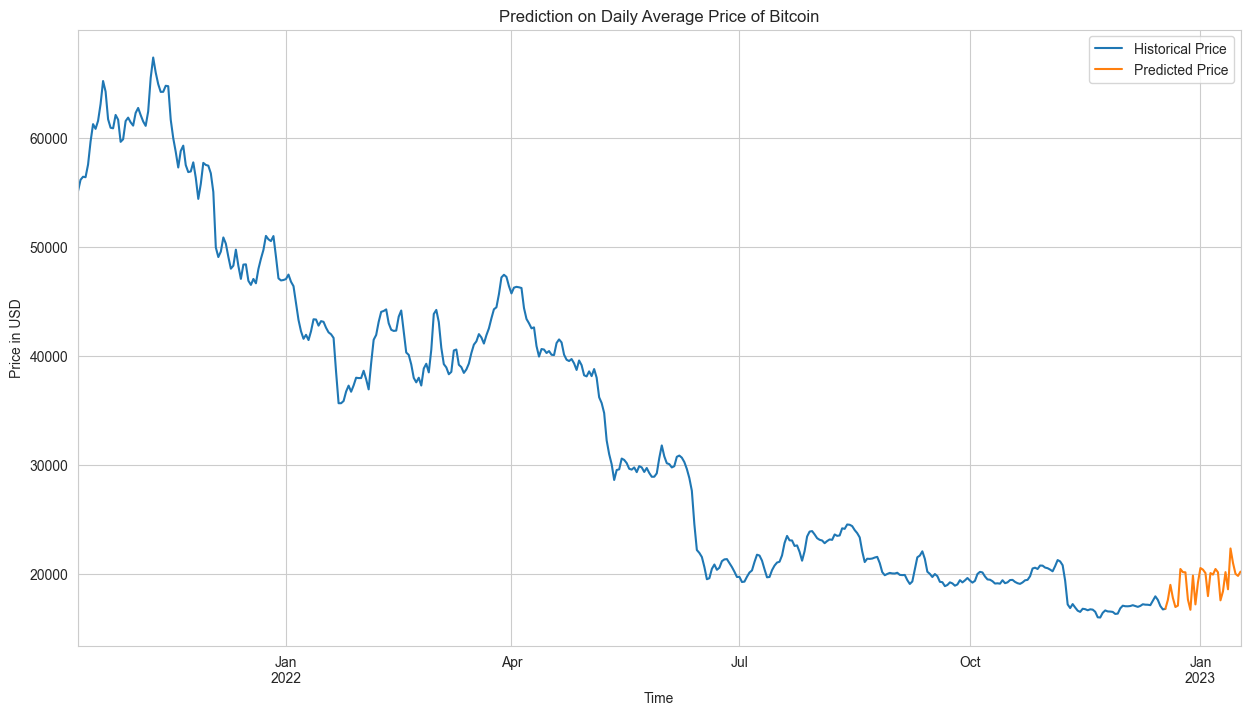

In [62]:
plt.figure(figsize=(15,8))
(bitcoin[:-30]['daily_avg']).plot(label='Historical Price')
(bitcoin[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Bitcoin')
plt.legend()
plt.show()

In [63]:
# define index for next 30 days
last_date=BTC.iloc[-1].name
modified_date = last_date + timedelta(days=1)
new_date = pd.date_range(modified_date,periods=30,freq='D')

# assign prediction to newly defined index
forecasted_BTC_RF = pd.DataFrame(forecasted_BTC_RF, columns=['daily_avg'], index=new_date)

# # combine historical price and predicted price
bitcoin = pd.concat([BTC[BTC['symbol']=='BTC'][['daily_avg']], forecasted_BTC_RF])
# # datetime.timedelta(days=1)

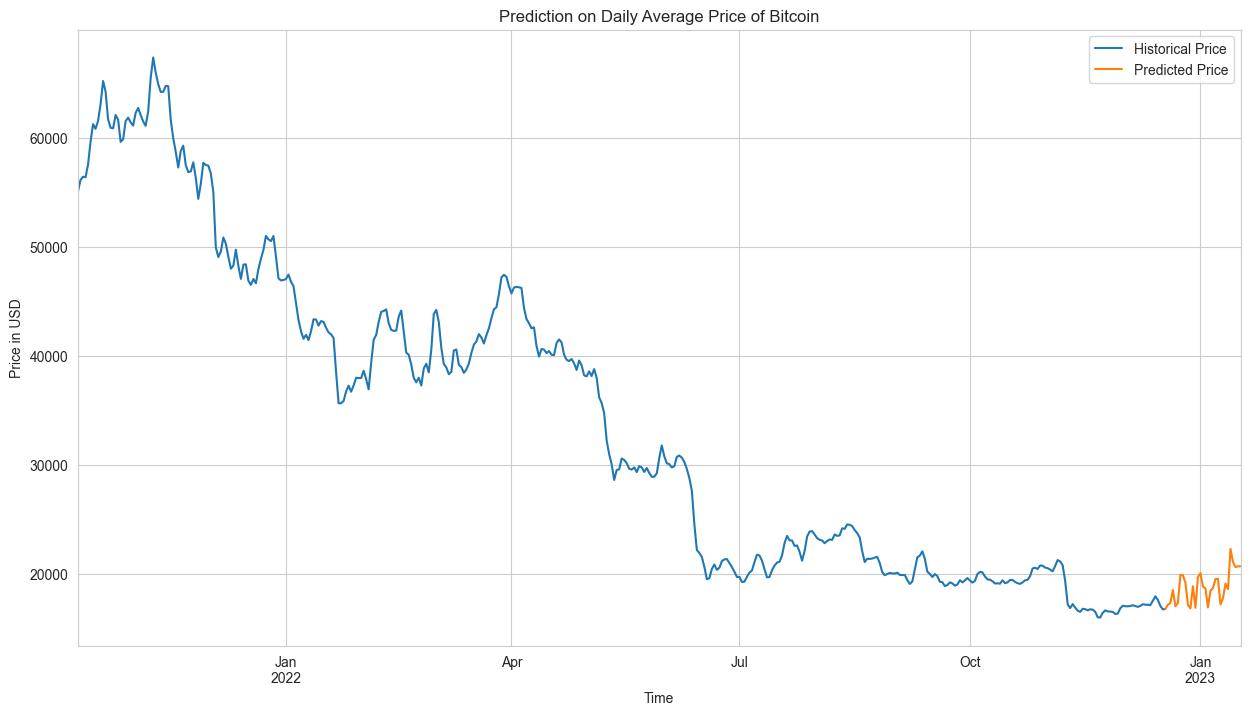

In [64]:
plt.figure(figsize=(15,8))
(bitcoin[:-30]['daily_avg']).plot(label='Historical Price')
(bitcoin[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Bitcoin')
plt.legend()
plt.show()

# prediction using facebook prophet

In [66]:
df1 = date_specified_coin.copy()

In [67]:
df1 =  df1.reset_index()
df1 = df1.sort_values(by='Date')

In [68]:
df2 = df1[['Date','Close']]

In [69]:
df2

Date         Close
0   2021-10-10  54771.579184
1   2021-10-11  57484.789465
2   2021-10-12  56041.056838
3   2021-10-13  57401.097527
4   2021-10-14  57321.525280
..         ...           ...
460 2023-01-13  19909.574625
461 2023-01-14  20976.299796
462 2023-01-15  20880.799202
463 2023-01-16  21169.632781
464 2023-01-17  21161.519220

[465 rows x 2 columns]

Facebook Prophet n'accepte que deux colonnes ds et y. Nous avons juste besoin de renommer la colonne Date en ds et la colonne Close en y.

In [70]:
#rename columns
prophet_df = df2.rename(columns={'Date':'ds',
                                'Close':'y'})

#check
prophet_df.columns

Index(['ds', 'y'], dtype='object')

C'est tout le pr√©traitement que nous devons faire. Il ne nous reste plus qu'√† initialiser en appelant Prophet() et √† ajuster le mod√®le avec prophet_df.

In [71]:
#initialize
model = Prophet()

#fit
model.fit(prophet_df)

20:27:28 - cmdstanpy - INFO - Chain [1] start processing
20:27:29 - cmdstanpy - INFO - Chain [1] done processing


Pr√©vision √† l'aide de Facebook Prophet

Nous allons utiliser le mod√®le Facebook Prophet pour pr√©voir 30 jours dans le futur. Nous pouvons simplement attribuer le nombre de p√©riodes que nous voulons voir dans le futur. Comme nous avons des donn√©es historiques quotidiennes, nous devons attribuer un nombre de p√©riode qui serait √©quivalent √† quotidiennement. Donc, pendant 120 jours, il doit √™tre p√©riodes = 120.

In [72]:
#forecast for the next 120 days
future = model.make_future_dataframe(periods=120)

#predict
forecast = model.predict(future)

In [73]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          585 non-null    datetime64[ns]
 1   trend                       585 non-null    float64       
 2   yhat_lower                  585 non-null    float64       
 3   yhat_upper                  585 non-null    float64       
 4   trend_lower                 585 non-null    float64       
 5   trend_upper                 585 non-null    float64       
 6   additive_terms              585 non-null    float64       
 7   additive_terms_lower        585 non-null    float64       
 8   additive_terms_upper        585 non-null    float64       
 9   weekly                      585 non-null    float64       
 10  weekly_lower                585 non-null    float64       
 11  weekly_upper                585 non-null    float64       

Comme vous pouvez le voir, nous obtenons une donn√©e qui a 19 colonnes :


Nos donn√©es vont du 2021 au 2023, ce qui signifie que les nouveaux 120 jours ont √©t√© ajout√©s √† nos donn√©es.

yhat_upper : limite sup√©rieure

yhat_lower : limite inf√©rieure

yhat : valeur pr√©dite

Prophet dispose d'outils de visualisation internes qui nous aideraient √† visualiser les pr√©visions en transmettant la nouvelle trame de donn√©es de pr√©vision :



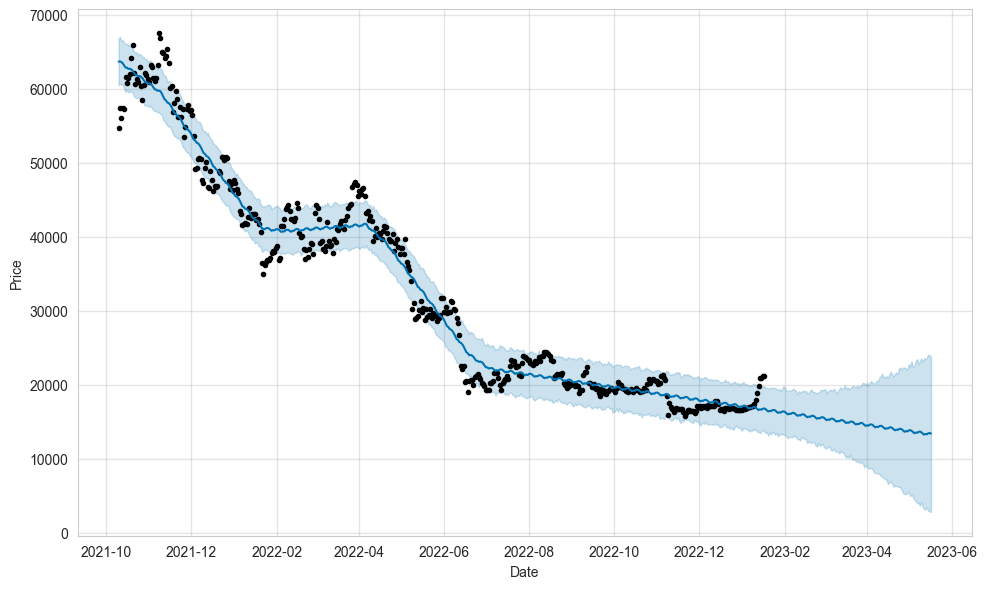

In [74]:

#visualize with Facebook internal tool
figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')

La ligne noire repr√©sente les donn√©es r√©elles

La ligne bleue est la valeur pr√©dite

La zone ombrag√©e est la limite sup√©rieure et la limite inf√©rieure.

Visualisons maintenant les tendances avec la fonction plot_component :

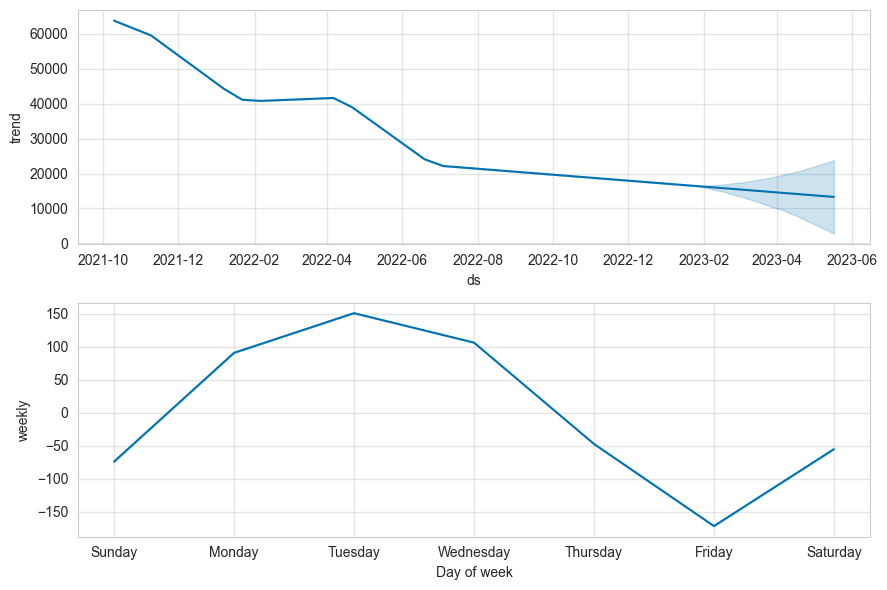

In [75]:
#visualize forecast
figure_2 = model.plot_components(forecast)

In [76]:
metric_df = forecast.set_index('ds')[['yhat']].join(prophet_df.set_index('ds').y).reset_index()

In [77]:
metric_df.tail()

ds          yhat   y
580 2023-05-13  13355.364303 NaN
581 2023-05-14  13308.477500 NaN
582 2023-05-15  13445.249326 NaN
583 2023-05-16  13477.409900 NaN
584 2023-05-17  13404.851710 NaN

In [78]:
metric_df.dropna(inplace=True)

In [79]:
metric_df.tail()

ds          yhat             y
460 2023-01-13  16594.514642  19909.574625
461 2023-01-14  16683.071863  20976.299796
462 2023-01-15  16636.185060  20880.799202
463 2023-01-16  16772.956886  21169.632781
464 2023-01-17  16805.117460  21161.519220

In [80]:
r2_score(metric_df.y, metric_df.yhat)

0.9730347338229866

In [81]:
mean_squared_error(metric_df.y, metric_df.yhat)

5717945.398797496

In [82]:
mean_absolute_error(metric_df.y, metric_df.yhat)

1849.4593796210502

# Prediction using LSTM

La prochaine √©tape du processus vient de la partie o√π nous pouvons commencer √† construire le mod√®le LSTM pour la pr√©vision des prix de cl√¥ture. Puisque nous voulons pr√©dire le cours de cl√¥ture, nous allons cr√©er une nouvelle trame de donn√©es pour n'inclure que ces donn√©es d'int√©r√™t pour notre mod√®le.


In [186]:
df = date_specified_coin.copy()

In [187]:
df =  df.reset_index()
df = df.sort_values(by='Date')

In [188]:
model_data = df[['Date','Close']]


Pr√©traitement des donn√©es

La prochaine √©tape serait de normaliser le cours de cl√¥ture entre 0 et 1 dans notre ensemble de donn√©es. Ceci est important pour changer les valeurs des prix de cl√¥ture √† une √©chelle commune sans fausser les diff√©rences dans les plages de valeurs.

In [189]:
del model_data['Date']
scaler = MinMaxScaler(feature_range=(0,1))
close_df = scaler.fit_transform(np.array(df['Close']).reshape(-1,1))
close_df

Divisions d'entra√Ænement et de test

L'√©tape suivante consisterait √† partitionner la trame de donn√©es en une division d'apprentissage et de test. Puisque nous disposons de donn√©es ad√©quates, utilisons un ratio de partage de formation et de test de 90/10.

In [191]:
training_size = int(len(close_df)*0.9)
test_size = len(close_df)-training_size
train_data,test_data = close_df[0:training_size,:],close_df[training_size:len(close_df),:1]
print('train_data: ', train_data.shape)
print('test_data: ', test_data.shape)

train_data:  (418, 1)
test_data:  (47, 1)


La prochaine √©tape consisterait √† transformer l'ensemble de donn√©es dans un format de s√©rie temporelle , y compris un pas de temps pour LSTM. Pour LSTM, le pas de temps repr√©sente le nombre ou la longueur des points de donn√©es pr√©c√©dents, y compris le point de donn√©es actuel pour la pr√©diction.

On peut d'abord d√©finir une fonction pour ajouter un pas de temps en dessous.

In [192]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

Ensuite, nous appliquerons la fonction sur notre jeu de donn√©es, y compris le pas de temps d√©fini.

In [193]:
time_step = 10 
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (407, 10, 1)
X_test:  (36, 10, 1)


Model Building

Next, we will start to define our LSTM model and the layers. Here we described ten hidden LSTM layers with a relu function (rectified linear unit activation function) and a Dense single layer.

The loss function computes the quantity that a model should seek to minimise during training (e.g. a lower MSE is preferred for regression problems in this example). Finally, the adam algorithm is used for optimisation.

More details on activations, losses or optimisation can be found here: Keras.

In [194]:
model = Sequential() 
# Adding a LSTM layer with 10 internal units
model.add(LSTM(10,input_shape=(None,1),activation='relu'))
# Adding a Dense layer with 1 units.
model.add(Dense(1))
# Loss function + optimizer
model.compile(loss='mean_squared_error',optimizer='adam')

Une fois le mod√®le, les couches, les couches d'activation, les fonctions de perte et les optimiseurs d√©finis, nous pouvons former le mod√®le. O√π les champs font r√©f√©rence aux √©l√©ments suivants :

√©poques = nombre de cycles pour former le r√©seau de neurones avec toutes les donn√©es de formation.

batch_size = nombre d'√©chantillons qui seront propag√©s sur le r√©seau. Par exemple, un batch_size de 100 signifierait que le mod√®le utiliserait les 100 premiers points de donn√©es de formation pour former le mod√®le, suivis des 100 suivants jusqu'√† ce que toutes les donn√©es de formation soient utilis√©es.

verbeux = d√©tail des r√©sultats pour chaque processus de formation. (verbose=0 ne vous montrera rien (silencieux)

verbose=1 vous montrera une barre de progression anim√©e et verbose=2 mentionnera le nombre d'√©poques)

In [226]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10)                480       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [195]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=10,verbose=1)

Epoch 1/100
41/41 [==============================] - 2s 10ms/step - loss: 0.1021 - val_loss: 0.0091
Epoch 2/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0259 - val_loss: 0.0319
Epoch 3/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0111 - val_loss: 0.0177
Epoch 4/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0088
Epoch 5/100
41/41 [==============================] - 0s 6ms/step - loss: 0.0037 - val_loss: 0.0049
Epoch 6/100
41/41 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0037
Epoch 7/100
41/41 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 8/100
41/41 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 9/100
41/41 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 10/100
41/41 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 11

41/41 [==============================] - 0s 4ms/step - loss: 9.5671e-04 - val_loss: 2.4654e-04
Epoch 81/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 2.5574e-04
Epoch 82/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 2.7910e-04
Epoch 83/100
41/41 [==============================] - 0s 5ms/step - loss: 9.9565e-04 - val_loss: 2.5906e-04
Epoch 84/100
41/41 [==============================] - 0s 5ms/step - loss: 9.8157e-04 - val_loss: 3.2378e-04
Epoch 85/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 2.5003e-04
Epoch 86/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 2.4092e-04
Epoch 87/100
41/41 [==============================] - 0s 5ms/step - loss: 9.2184e-04 - val_loss: 2.3924e-04
Epoch 88/100
41/41 [==============================] - 0s 5ms/step - loss: 9.4328e-04 - val_loss: 2.4585e-04
Epoch 89/100
41/41 [==============================] - 0s 

Nous pouvons alors comparer la validation le training loss o√π :

Validation loss indique dans quelle mesure le mod√®le s'adapte aux nouvelles donn√©es.

Training loss indique dans quelle mesure le mod√®le correspond aux donn√©es d'entra√Ænement.

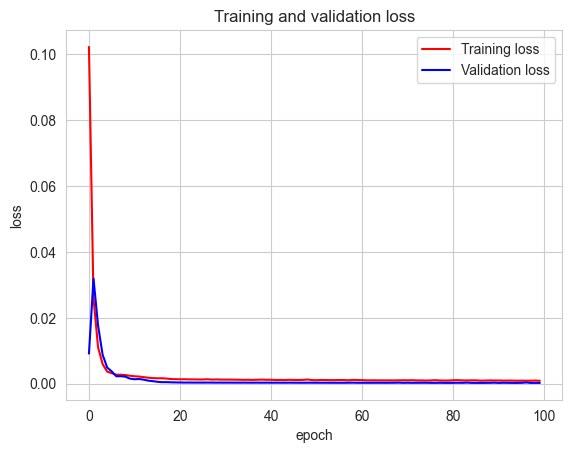

<Figure size 640x480 with 0 Axes>

In [220]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc=0)
plt.figure()
plt.show()

Pr√©diction du mod√®le

Enfin, nous pouvons pr√©dire les cours de cl√¥ture √† partir de notre mod√®le LSTM en utilisant les param√®tres d√©finis ci-dessus.

In [214]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
look_back=time_step
trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_df)-1, :] = test_predict
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])
plotdf = pd.DataFrame({'date': df['Date'],
                       'original_close': df['Close'],
                      'train_predicted_close': scaler.inverse_transform(np.array(trainPredictPlot).reshape(-1,1)).reshape(1,-1).tolist()[0],
                      'test_predicted_close': scaler.inverse_transform(np.array(testPredictPlot).reshape(-1,1)).reshape(1,-1).tolist()[0]})
fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original vs predicted close price',
                  plot_bgcolor='white',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

2/2 [==============================] - 0s 3ms/step


Et si nous voulons utiliser le mod√®le pour les pr√©visions futures pour les 60 prochains jours.

In [215]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output=[]
n_steps=time_step
i=0
pred_days = 60
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
temp_mat = np.empty(pred_days+1)
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]
next_predicted_days_value = temp_mat

next_predicted_days_value = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'Predicted Close':next_predicted_days_value
})
names = cycle(['Predicted next 60 days close price'])
fig = px.line(new_pred_plot,x=new_pred_plot.index, y= new_pred_plot['Predicted Close'],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Next 60 days Closing price prediction',
                  plot_bgcolor='white',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

√âvaluation du mod√®le

Enfin, une √©tape importante lorsqu'il s'agit de mod√®les d'apprentissage automatique consiste √† √©valuer les performances de notre mod√®le. Cela permettra une comparaison avec d'autres mod√®les ou une r√©f√©rence si nous d√©cidons d'ajuster le mod√®le.


In [216]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

Comme il s'agit d'un probl√®me de r√©gression, nous utiliserons les mesures de performances suivantes.

In [221]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("-------------------------------------------------------------------------------------")

print("data R2 score:", r2_score(original_ytest, test_predict))

Train data RMSE:  1507.92804827045
Train data MSE:  2273846.9987607286
Train data MAE:  1066.5846486769449
-------------------------------------------------------------------------------------
Test data RMSE:  783.8748313881724
Test data MSE:  614459.7512838357
Test data MAE:  515.266603548685
-------------------------------------------------------------------------------------
data R2 score: 0.6222067486484143


C'est tout dans la construction et l'√©valuation d'un mod√®le LSTM pour la pr√©vision des prix Bitcoin. N'h√©sitez pas √† exp√©rimenter en modifiant les param√®tres du mod√®le, en entra√Ænant et en testant la partition fractionn√©e pour obtenir un mod√®le optimal avec des r√©sultats prometteurs !

